<a href="https://colab.research.google.com/github/vishakanilavan/Industrial-copper-Model/blob/main/CAPSTONE_INDUSTRIAL_COPPER_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) IMPORTING LIBRARIES AND LOADING DATASET

In [ ]:
import time
start_time = time.time()

#load packages
import sys #access to system parameters 
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

import sklearn as sk 
print("SciPy version: {}". format(sk.__version__)) 

import IPython
from IPython import display 
print("IPython version: {}". format(IPython.__version__)) 

import random

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import pandas as pd
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
SciPy version: 1.10.1
SciPy version: 1.2.2
IPython version: 7.34.0
-------------------------


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/PROJECTS/Copper_Set.xlsx - Result 1.csv")

In [ ]:
df=data.copy()

In [ ]:
df # 2 Rows were lost while reading

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


2) DATA PREPROCESSING AND EDA:

2.1) INITIAL ANALYSIS:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
# Numerical columns
Num_df=df.select_dtypes(exclude='object')
Num_col=list(Num_df.columns)

# Categorical Columns
Cat_df=df.select_dtypes(include='object')
Cat_col=list(Cat_df.columns)

In [ ]:
print("The Numerical columns are",Num_col)
print("The Categorical columns are",Cat_col)

The Numerical columns are ['item_date', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'delivery date', 'selling_price']
The Categorical columns are ['id', 'quantity tons', 'status', 'item type', 'material_ref']


In [ ]:
df.describe() #  For Numerical columns

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [ ]:
df.describe(exclude=['int64','float64']) # For Categorical columns

,id,quantity tons,status,item type,material_ref
count,181671,181673.000000,181671,181673,103754
unique,181671,181673.000000,9,7,16563
top,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,Won,W,DX51D+Z
freq,1,1.000000,116010,105615,922


<Axes: >

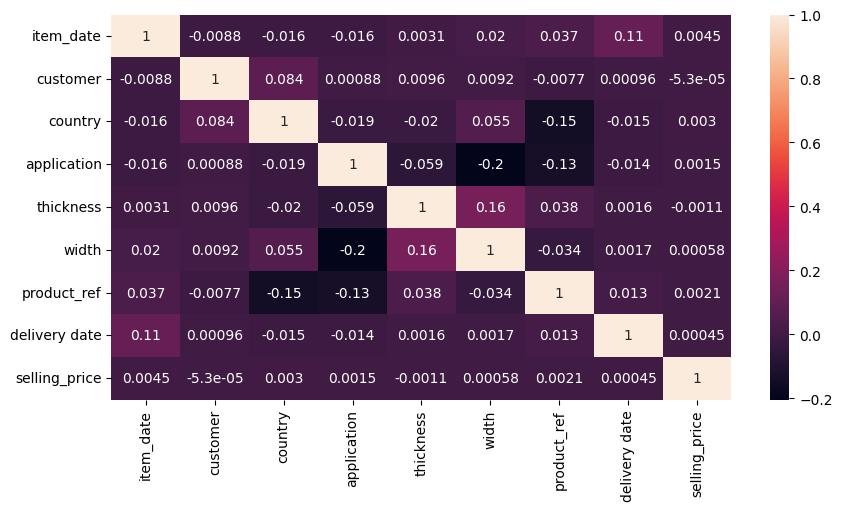

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

2.2)DATA CLEANING:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
# dealing with data in wrong format
# for categorical variables, this step is ignored
# df = df[df['status'].isin(['Won', 'Lost'])]
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d',errors='coerce')
#df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181670 non-null  datetime64[ns]
 2   quantity tons  181673 non-null  object        
 3   customer       181672 non-null  float64       
 4   country        181645 non-null  float64       
 5   status         181671 non-null  object        
 6   item type      181673 non-null  object        
 7   application    181649 non-null  float64       
 8   thickness      181672 non-null  float64       
 9   width          181673 non-null  float64       
 10  material_ref   103754 non-null  object        
 11  product_ref    181673 non-null  int64         
 12  delivery date  181670 non-null  datetime64[ns]
 13  selling_price  181672 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(5

In [ ]:
#checking all data points dtypes or any str in float dtype column
 
for i in Num_col: # continuous variable
    print(f'Feature "{i}" has all data points with same datatype:', df[i].apply(lambda x:isinstance(x, float) or isinstance(x, int)).all())
    print(df[i].dtypes)
    print('------------------------')

Feature "item_date" has all data points with same datatype: False
datetime64[ns]
------------------------
Feature "customer" has all data points with same datatype: True
float64
------------------------
Feature "country" has all data points with same datatype: True
float64
------------------------
Feature "application" has all data points with same datatype: True
float64
------------------------
Feature "thickness" has all data points with same datatype: True
float64
------------------------
Feature "width" has all data points with same datatype: True
float64
------------------------
Feature "product_ref" has all data points with same datatype: True
int64
------------------------
Feature "delivery date" has all data points with same datatype: False
datetime64[ns]
------------------------
Feature "selling_price" has all data points with same datatype: True
float64
------------------------


So, All Continuous variables are pure. There is no mix of 'str' in the columns.

In [ ]:
# As 'quantity tons' is numerical in visibility but it is described as 'object'. So try to convert into float64 explicitly
#df['quantity tons']=df['quantity tons'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181670 non-null  datetime64[ns]
 2   quantity tons  181673 non-null  object        
 3   customer       181672 non-null  float64       
 4   country        181645 non-null  float64       
 5   status         181671 non-null  object        
 6   item type      181673 non-null  object        
 7   application    181649 non-null  float64       
 8   thickness      181672 non-null  float64       
 9   width          181673 non-null  float64       
 10  material_ref   103754 non-null  object        
 11  product_ref    181673 non-null  int64         
 12  delivery date  181670 non-null  datetime64[ns]
 13  selling_price  181672 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(5

In [ ]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [ ]:
df[df['quantity tons'].eq('e')==True].index

Int64Index([173086], dtype='int64')

In [ ]:
#TREATING MIXED DTYPE COLUMN 'quantity tons' with median after converting str to 0
df['quantity tons'].iloc[173086] = 0
df['quantity tons'].iloc[173086] = df['quantity tons'].median()

In [ ]:
df['quantity tons']=df['quantity tons'].astype('float64')

In [ ]:
#treating rubbish value in material_ref with nan
#TypeError: bad operand type for unary ~: 'float'" .The ~ operator is used to invert a boolean array or mask, but it only works with boolean values
a=df['material_ref'].str.startswith("000000")
print(a)
b=(a==True)
df['material_ref'][b] = np.NaN
#print(b,df[~b])


0         False
1         False
2         False
3         False
4         False
          ...  
181668    False
181669    False
181670    False
181671    False
181672    False
Name: material_ref, Length: 181673, dtype: object


In [ ]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


2.3) HANDLING MISSING VALUES:

In [ ]:
df.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [ ]:
df.nunique()

id               181671
item_date           250
quantity tons    181672
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16562
product_ref          33
delivery date        26
selling_price      9795
dtype: int64

In [ ]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [ ]:
# Numerical columns
Num_df=df.select_dtypes(exclude='object')
Num_col=list(Num_df.columns)

# Categorical Columns
Cat_df=df.select_dtypes(include='object')
Cat_col=list(Cat_df.columns)

In [ ]:
for col in Num_col:
  if col != 'id':
    df[col].fillna(df[col].median(),inplace=True)

for col in Cat_col:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181673 non-null  object        
 1   item_date      181673 non-null  datetime64[ns]
 2   quantity tons  181673 non-null  float64       
 3   customer       181673 non-null  float64       
 4   country        181673 non-null  float64       
 5   status         181673 non-null  object        
 6   item type      181673 non-null  object        
 7   application    181673 non-null  float64       
 8   thickness      181673 non-null  float64       
 9   width          181673 non-null  float64       
 10  material_ref   181673 non-null  object        
 11  product_ref    181673 non-null  int64         
 12  delivery date  181673 non-null  datetime64[ns]
 13  selling_price  181673 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4

In [ ]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


2.4)HANDLING UNWANTED COLUMNS:

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [ ]:
df_classifier=df.copy()

E.D.A --1:

2.5) HANDLING LABELED DATA:

In [ ]:
Cat_col

['id', 'status', 'item type', 'material_ref']

In [ ]:
Cat_col.remove('id')

In [ ]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in Cat_col:
  df[col]=label_encoder.fit_transform(df[col])

In [ ]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,7,5,10.0,2.00,1500.0,10440,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,7,5,41.0,0.80,1210.0,1472,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,7,6,28.0,0.38,952.0,14747,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,7,3,59.0,2.30,1317.0,10714,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,7,5,10.0,4.00,2000.0,4252,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,7,5,41.0,0.96,1220.0,478,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,7,5,41.0,0.95,1500.0,310,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,7,5,41.0,0.71,1250.0,703,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,7,5,41.0,0.85,1250.0,513,164141591,2020-07-01,601.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181673 non-null  datetime64[ns]
 1   quantity tons  181673 non-null  float64       
 2   customer       181673 non-null  float64       
 3   country        181673 non-null  float64       
 4   status         181673 non-null  int64         
 5   item type      181673 non-null  int64         
 6   application    181673 non-null  float64       
 7   thickness      181673 non-null  float64       
 8   width          181673 non-null  float64       
 9   material_ref   181673 non-null  int64         
 10  product_ref    181673 non-null  int64         
 11  delivery date  181673 non-null  datetime64[ns]
 12  selling_price  181673 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(4)
memory usage: 18.0 MB


<Axes: >

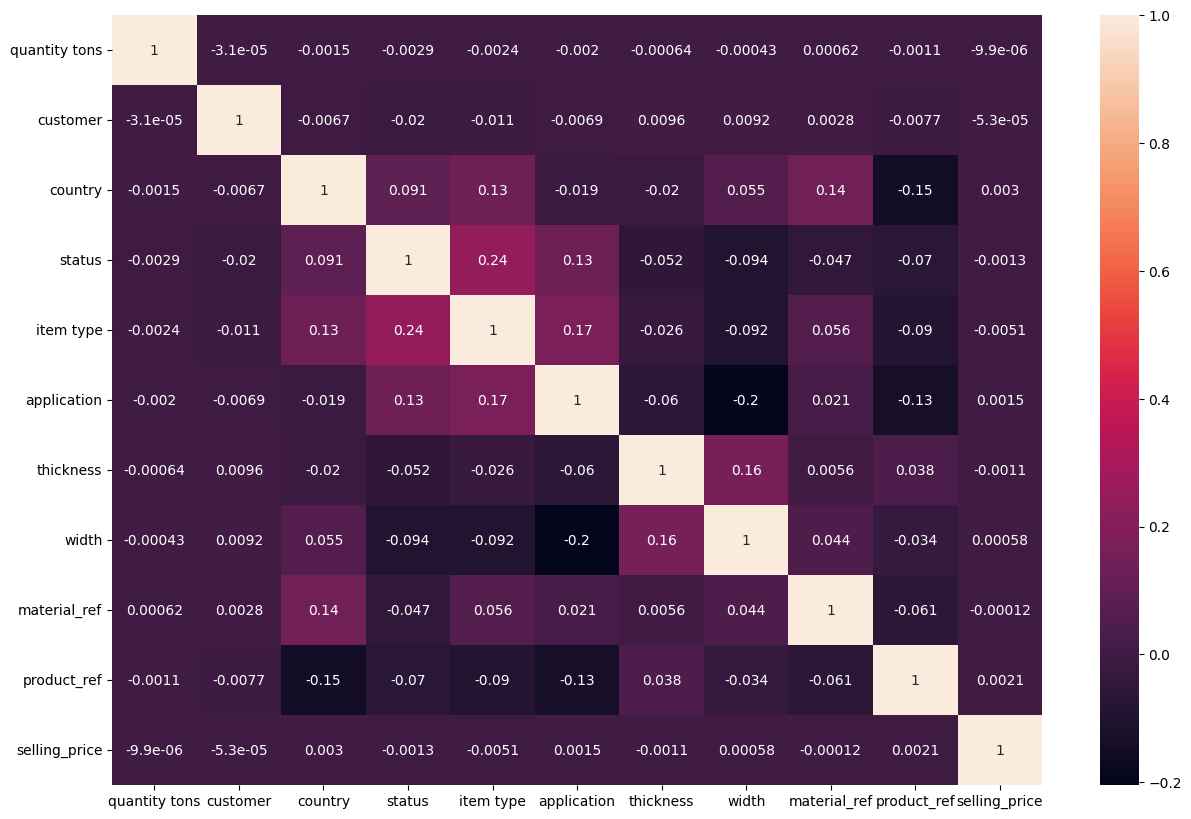

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

2.6) HANDLING SKEWED DATA:

In [ ]:
columns=list(df.columns)
columns

['item_date',
 'quantity tons',
 'customer',
 'country',
 'status',
 'item type',
 'application',
 'thickness',
 'width',
 'material_ref',
 'product_ref',
 'delivery date',
 'selling_price']

In [ ]:
for col in columns:
    if df[col].dtype != 'datetime64[ns]': # Skew can't work in datetime64
        print(f'The skewness of {col} is', df[col].skew())

The skewness of quantity tons is 424.69081645105615
The skewness of customer is 86.98530835413473
The skewness of country is 0.7538348729685946
The skewness of status is -0.802096510378636
The skewness of item type is -0.4875370675112151
The skewness of application is 0.7245643807542177
The skewness of thickness is 303.4475711614558
The skewness of width is 0.3745967719109581
The skewness of material_ref is -0.8468855024517874
The skewness of product_ref is 1.0152155732872308
The skewness of selling_price is 301.3880879059445


In [ ]:
skew_columns=['thickness','selling_price','quantity tons','customer']
skew_columns=['thickness','quantity tons','customer']


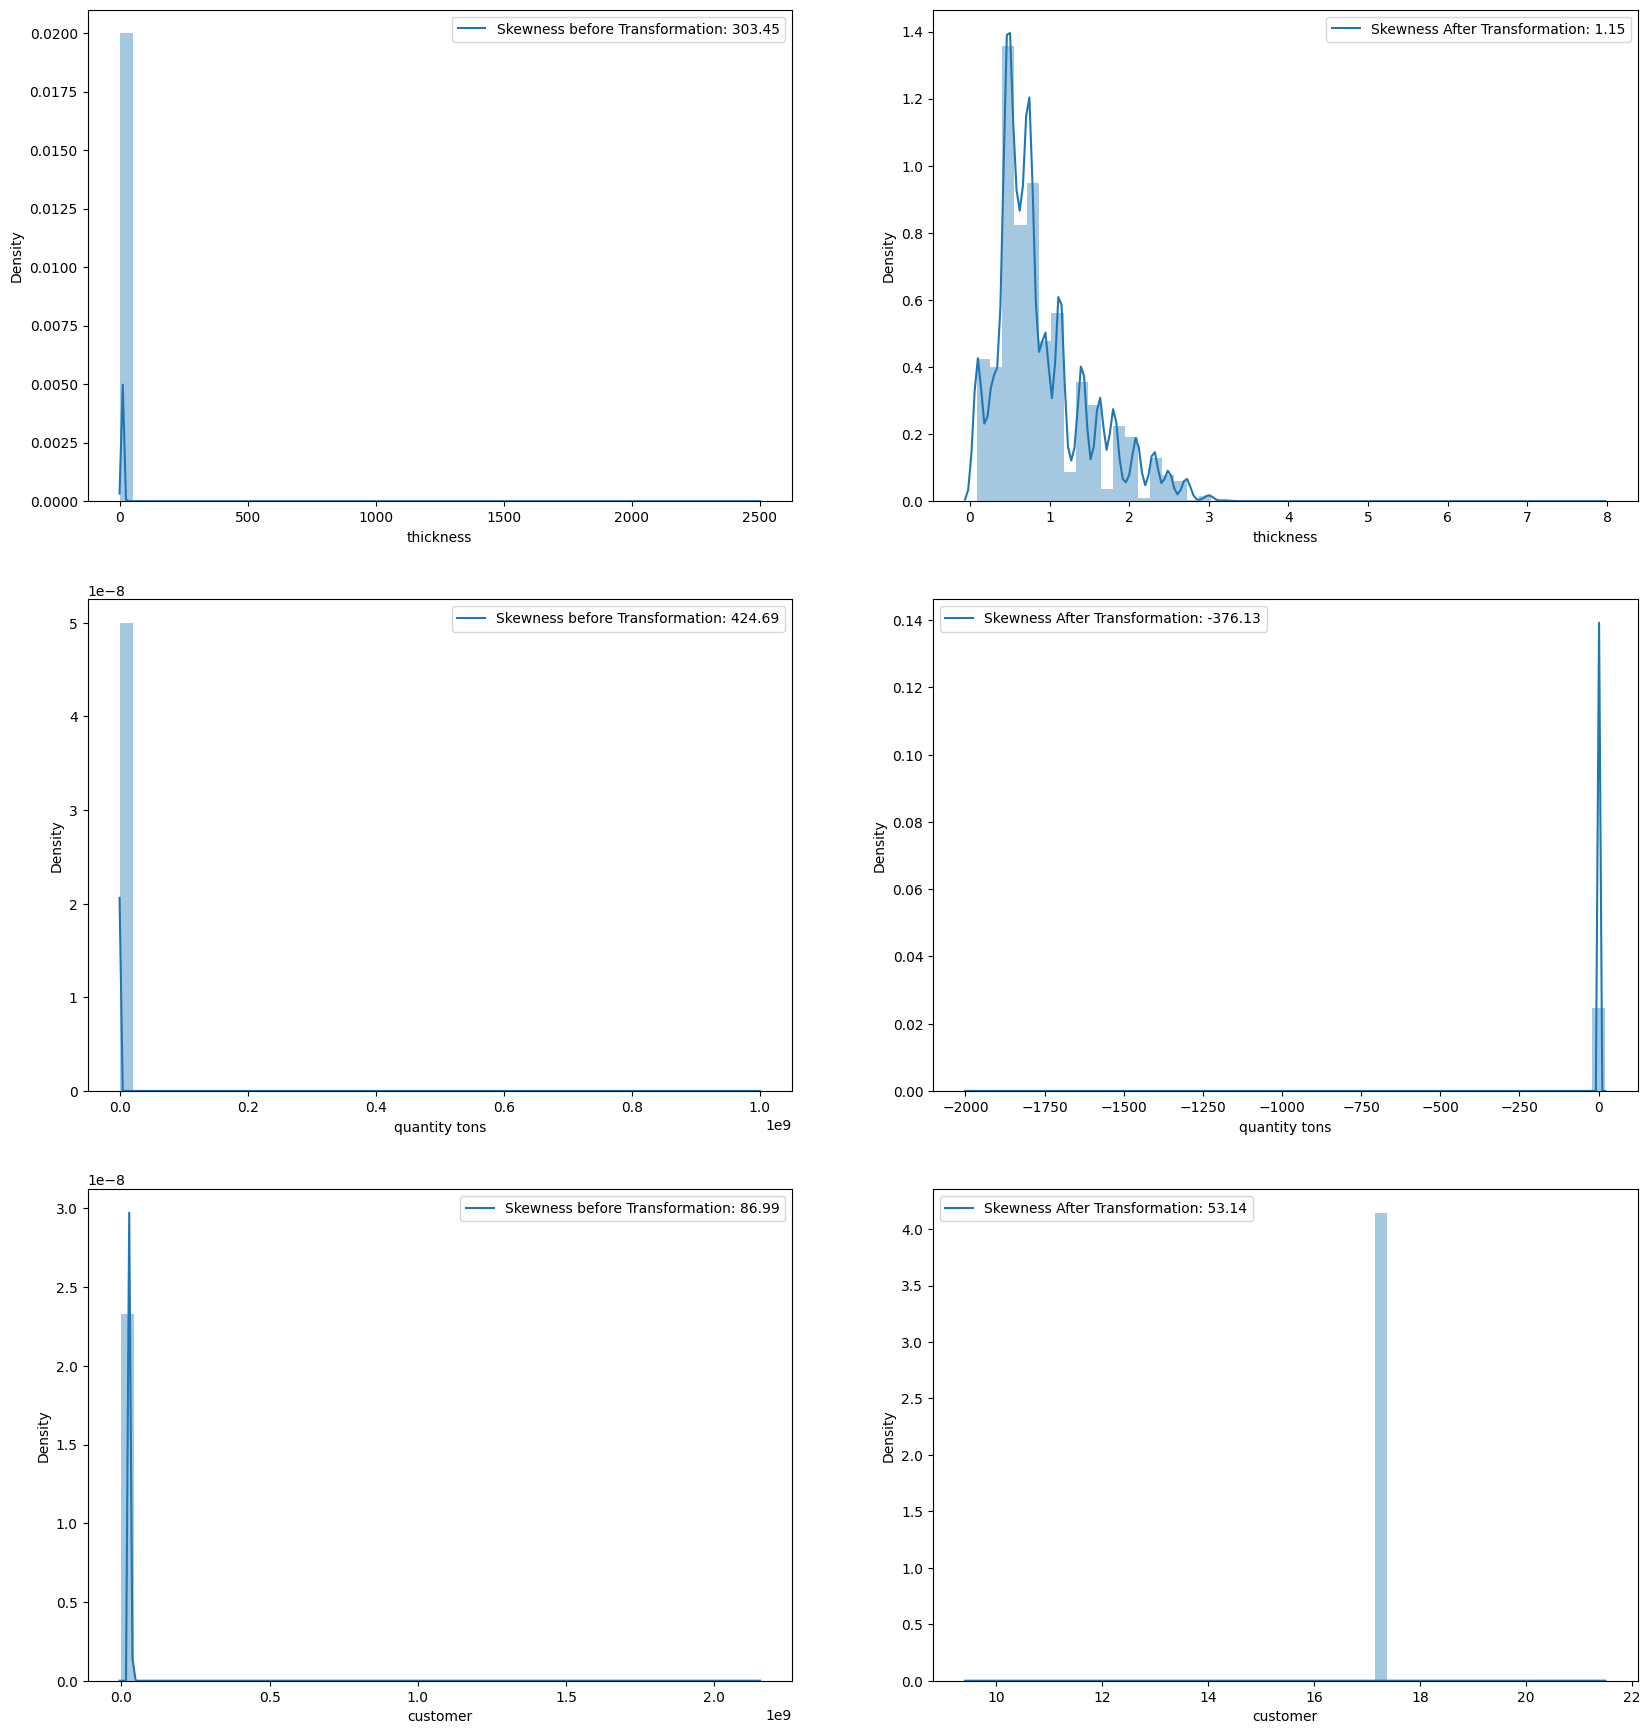

In [ ]:
plt.figure(figsize=(20,60))
x=1
for j,col in enumerate(skew_columns):
      plt.subplot(8,2,x)
      sns.distplot(df[col],kde=True)
      plt.legend(labels=["Skewness before Transformation: %.2f"%(df[col].skew())])
      x=x+1

      df[col]=df[col].apply(lambda i: np.log(i+0.1) if i>=1.0 else i)
      plt.subplot(8,2,x)
      sns.distplot(df[col],kde=True)
      plt.legend(labels=["Skewness After Transformation: %.2f"%(df[col].skew())])
      x=x+1

plt.show()

In [ ]:
'''from scipy import stats

# Assume x is a right-skewed continuous variable
transformed_x1, lam = stats.boxcox(df['thickness'])

# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['thickness'], ax=ax[0])
sns.histplot(transformed_x1, ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed THICKNESS (lambda={:.2f})".format(lam))
plt.show()'''

'from scipy import stats\n\n# Assume x is a right-skewed continuous variable\ntransformed_x1, lam = stats.boxcox(df[\'thickness\'])\n\n# Plot the original and transformed variables\nfig, ax = plt.subplots(1, 2, figsize=(10, 5))\nsns.histplot(df[\'thickness\'], ax=ax[0])\nsns.histplot(transformed_x1, ax=ax[1])\nax[0].set_title("Original data")\nax[1].set_title("Transformed THICKNESS (lambda={:.2f})".format(lam))\nplt.show()'

In [ ]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,3.993624,17.221905,28.0,7,5,10.0,0.741937,1500.0,10440,1670798778,2021-07-01,854.00
1,2021-04-01,6.643952,17.223450,25.0,7,5,41.0,0.800000,1210.0,1472,1668701718,2021-04-01,1047.00
2,2021-04-01,5.956428,17.221827,30.0,7,6,28.0,0.380000,952.0,14747,628377,2021-01-01,644.33
3,2021-04-01,5.310795,17.228293,32.0,7,3,59.0,0.875469,1317.0,10714,1668701718,2021-01-01,768.00
4,2021-04-01,6.666481,17.223735,28.0,7,5,10.0,1.410987,2000.0,4252,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,4.630667,17.223381,25.0,7,5,41.0,0.960000,1220.0,478,164141591,2020-07-01,591.00
181669,2020-07-02,5.338434,17.223381,25.0,7,5,41.0,0.950000,1500.0,310,164141591,2020-07-01,589.00
181670,2020-07-02,1.466859,17.223381,25.0,7,5,41.0,0.710000,1250.0,703,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,17.223381,25.0,7,5,41.0,0.850000,1250.0,513,164141591,2020-07-01,601.00


2.7) HANDLING OUTLIERS:

In [ ]:
new_df=df.drop(['status', 'item type', 'material_ref','item_date','delivery date'],axis=1) # As these columns are either labeled data or date datatype

In [ ]:
columns= list(new_df.columns)
columns

['quantity tons',
 'customer',
 'country',
 'application',
 'thickness',
 'width',
 'product_ref',
 'selling_price']

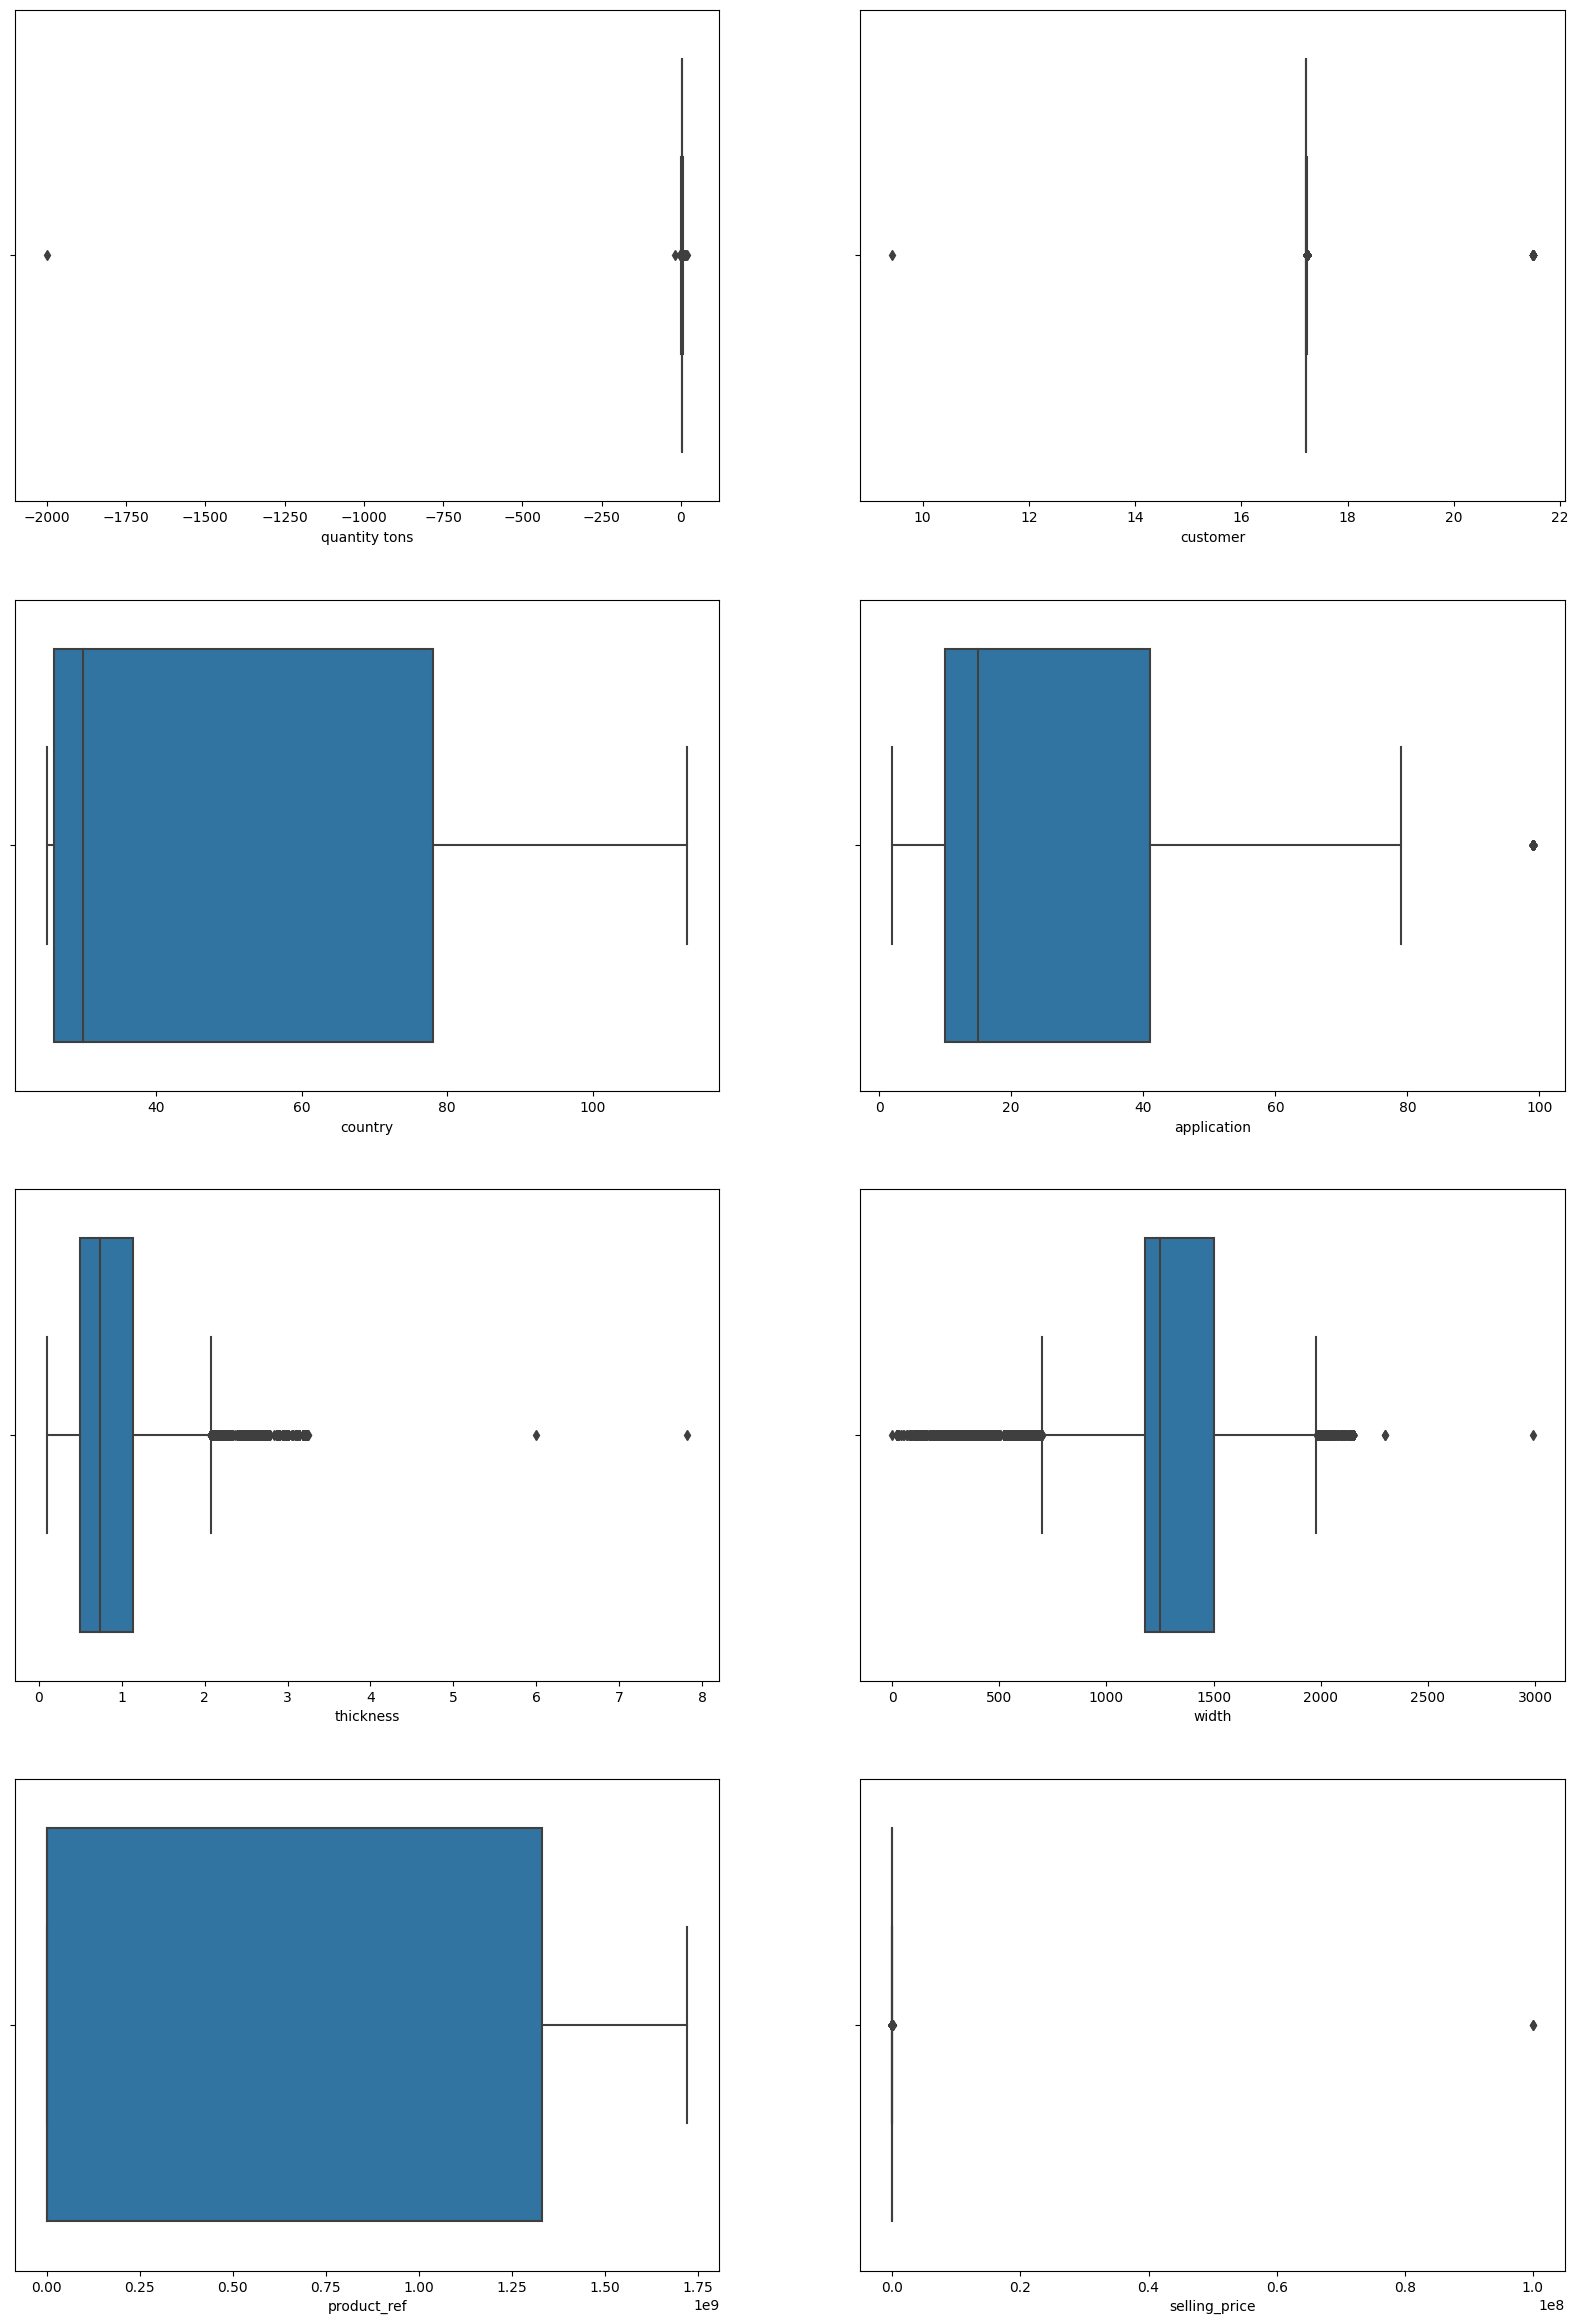

In [ ]:
plt.figure(figsize=(20,60))
i=1
for col in columns:
  plt.subplot(8,2,i)
  sns.boxplot(x=col,data=df)
  plt.xlabel
  i=i+1

In [ ]:
outlier_index=[]
for i in columns:
    import numpy as np
    q1=np.percentile(new_df[i],25,interpolation="midpoint")
    q3=np.percentile(new_df[i],75,interpolation="midpoint")
    print("q1 value of {i} is {q1}".format(i=i,q1=q1))
    iqr1=q3-q1
    print("q3 value of {i} is {q2}".format(i=i,q2=q3))
    print("iqr value of {i} is {iqr}".format(i=i,iqr=iqr1))
    lower=df.index[new_df[i]<(q1-1.5*iqr1)]
    lowercount=np.size(lower)
    print("Lower Outlier of {column} are {lower} counts".format(column=i,lower=lowercount))
    outlier_index.extend(lower)
    upper=df.index[new_df[i]>(q3+1.5*iqr1)]
    uppercount=np.size(upper)
    print("Upper Outlier of {column} are {upper} counts".format(column=i,upper=uppercount))
    outlier_index.extend(upper)
    totalcount=lowercount+uppercount
    print("Total Outliers of {column} is {x}".format(column=i,x=totalcount))
    

outlier_index.sort()
outlier_index1=sorted(set(outlier_index),key=outlier_index.index)  
print("Total outliers of all columns are",len(outlier_index))
print("Total unique outliers of all columns are",len(outlier_index1))

q1 value of quantity tons is 2.404272511281501
q3 value of quantity tons is 4.208571425594014
iqr value of quantity tons is 1.8042989143125134
Lower Outlier of quantity tons are 4 counts
Upper Outlier of quantity tons are 2132 counts
Total Outliers of quantity tons is 2136
q1 value of customer is 17.223249301525453
q3 value of customer is 17.22601172818283
iqr value of customer is 0.002762426657376693
Lower Outlier of customer are 1 counts
Upper Outlier of customer are 1343 counts
Total Outliers of customer is 1344
q1 value of country is 26.0
q3 value of country is 78.0
iqr value of country is 52.0
Lower Outlier of country are 0 counts
Upper Outlier of country are 0 counts
Total Outliers of country is 0
q1 value of application is 10.0
q3 value of application is 41.0
iqr value of application is 31.0
Lower Outlier of application are 0 counts
Upper Outlier of application are 146 counts
Total Outliers of application is 146
q1 value of thickness is 0.5
q3 value of thickness is 1.13140211149

In [ ]:
for i in columns:
    import numpy as np
    q1=np.percentile(new_df[i],25,interpolation="midpoint")
    q3=np.percentile(new_df[i],75,interpolation="midpoint")
    print("q1 value of {i} is {q1}".format(i=i,q1=q1))
    iqr1=q3-q1
    print("q3 value of {i} is {q2}".format(i=i,q2=q3))
    print("iqr value of {i} is {iqr}".format(i=i,iqr=iqr1))
    lower_limit=q1-1.5*iqr1
    upper_limit=q3+1.5*iqr1
    print("Lower limit",lower_limit)
    print("Upper limit",upper_limit)
    df[i]=np.where(new_df[i]<lower_limit,lower_limit,np.where(new_df[i]>upper_limit,upper_limit,df[i]))


q1 value of quantity tons is 2.404272511281501
q3 value of quantity tons is 4.208571425594014
iqr value of quantity tons is 1.8042989143125134
Lower limit -0.3021758601872695
Upper limit 6.915019797062785
q1 value of customer is 17.223249301525453
q3 value of customer is 17.22601172818283
iqr value of customer is 0.002762426657376693
Lower limit 17.219105661539388
Upper limit 17.230155368168894
q1 value of country is 26.0
q3 value of country is 78.0
iqr value of country is 52.0
Lower limit -52.0
Upper limit 156.0
q1 value of application is 10.0
q3 value of application is 41.0
iqr value of application is 31.0
Lower limit -36.5
Upper limit 87.5
q1 value of thickness is 0.5
q3 value of thickness is 1.1314021114911006
iqr value of thickness is 0.6314021114911006
Lower limit -0.4471031672366509
Upper limit 2.0785052787277514
q1 value of width is 1180.0
q3 value of width is 1500.0
iqr value of width is 320.0
Lower limit 700.0
Upper limit 1980.0
q1 value of product_ref is 611993.0
q3 value of

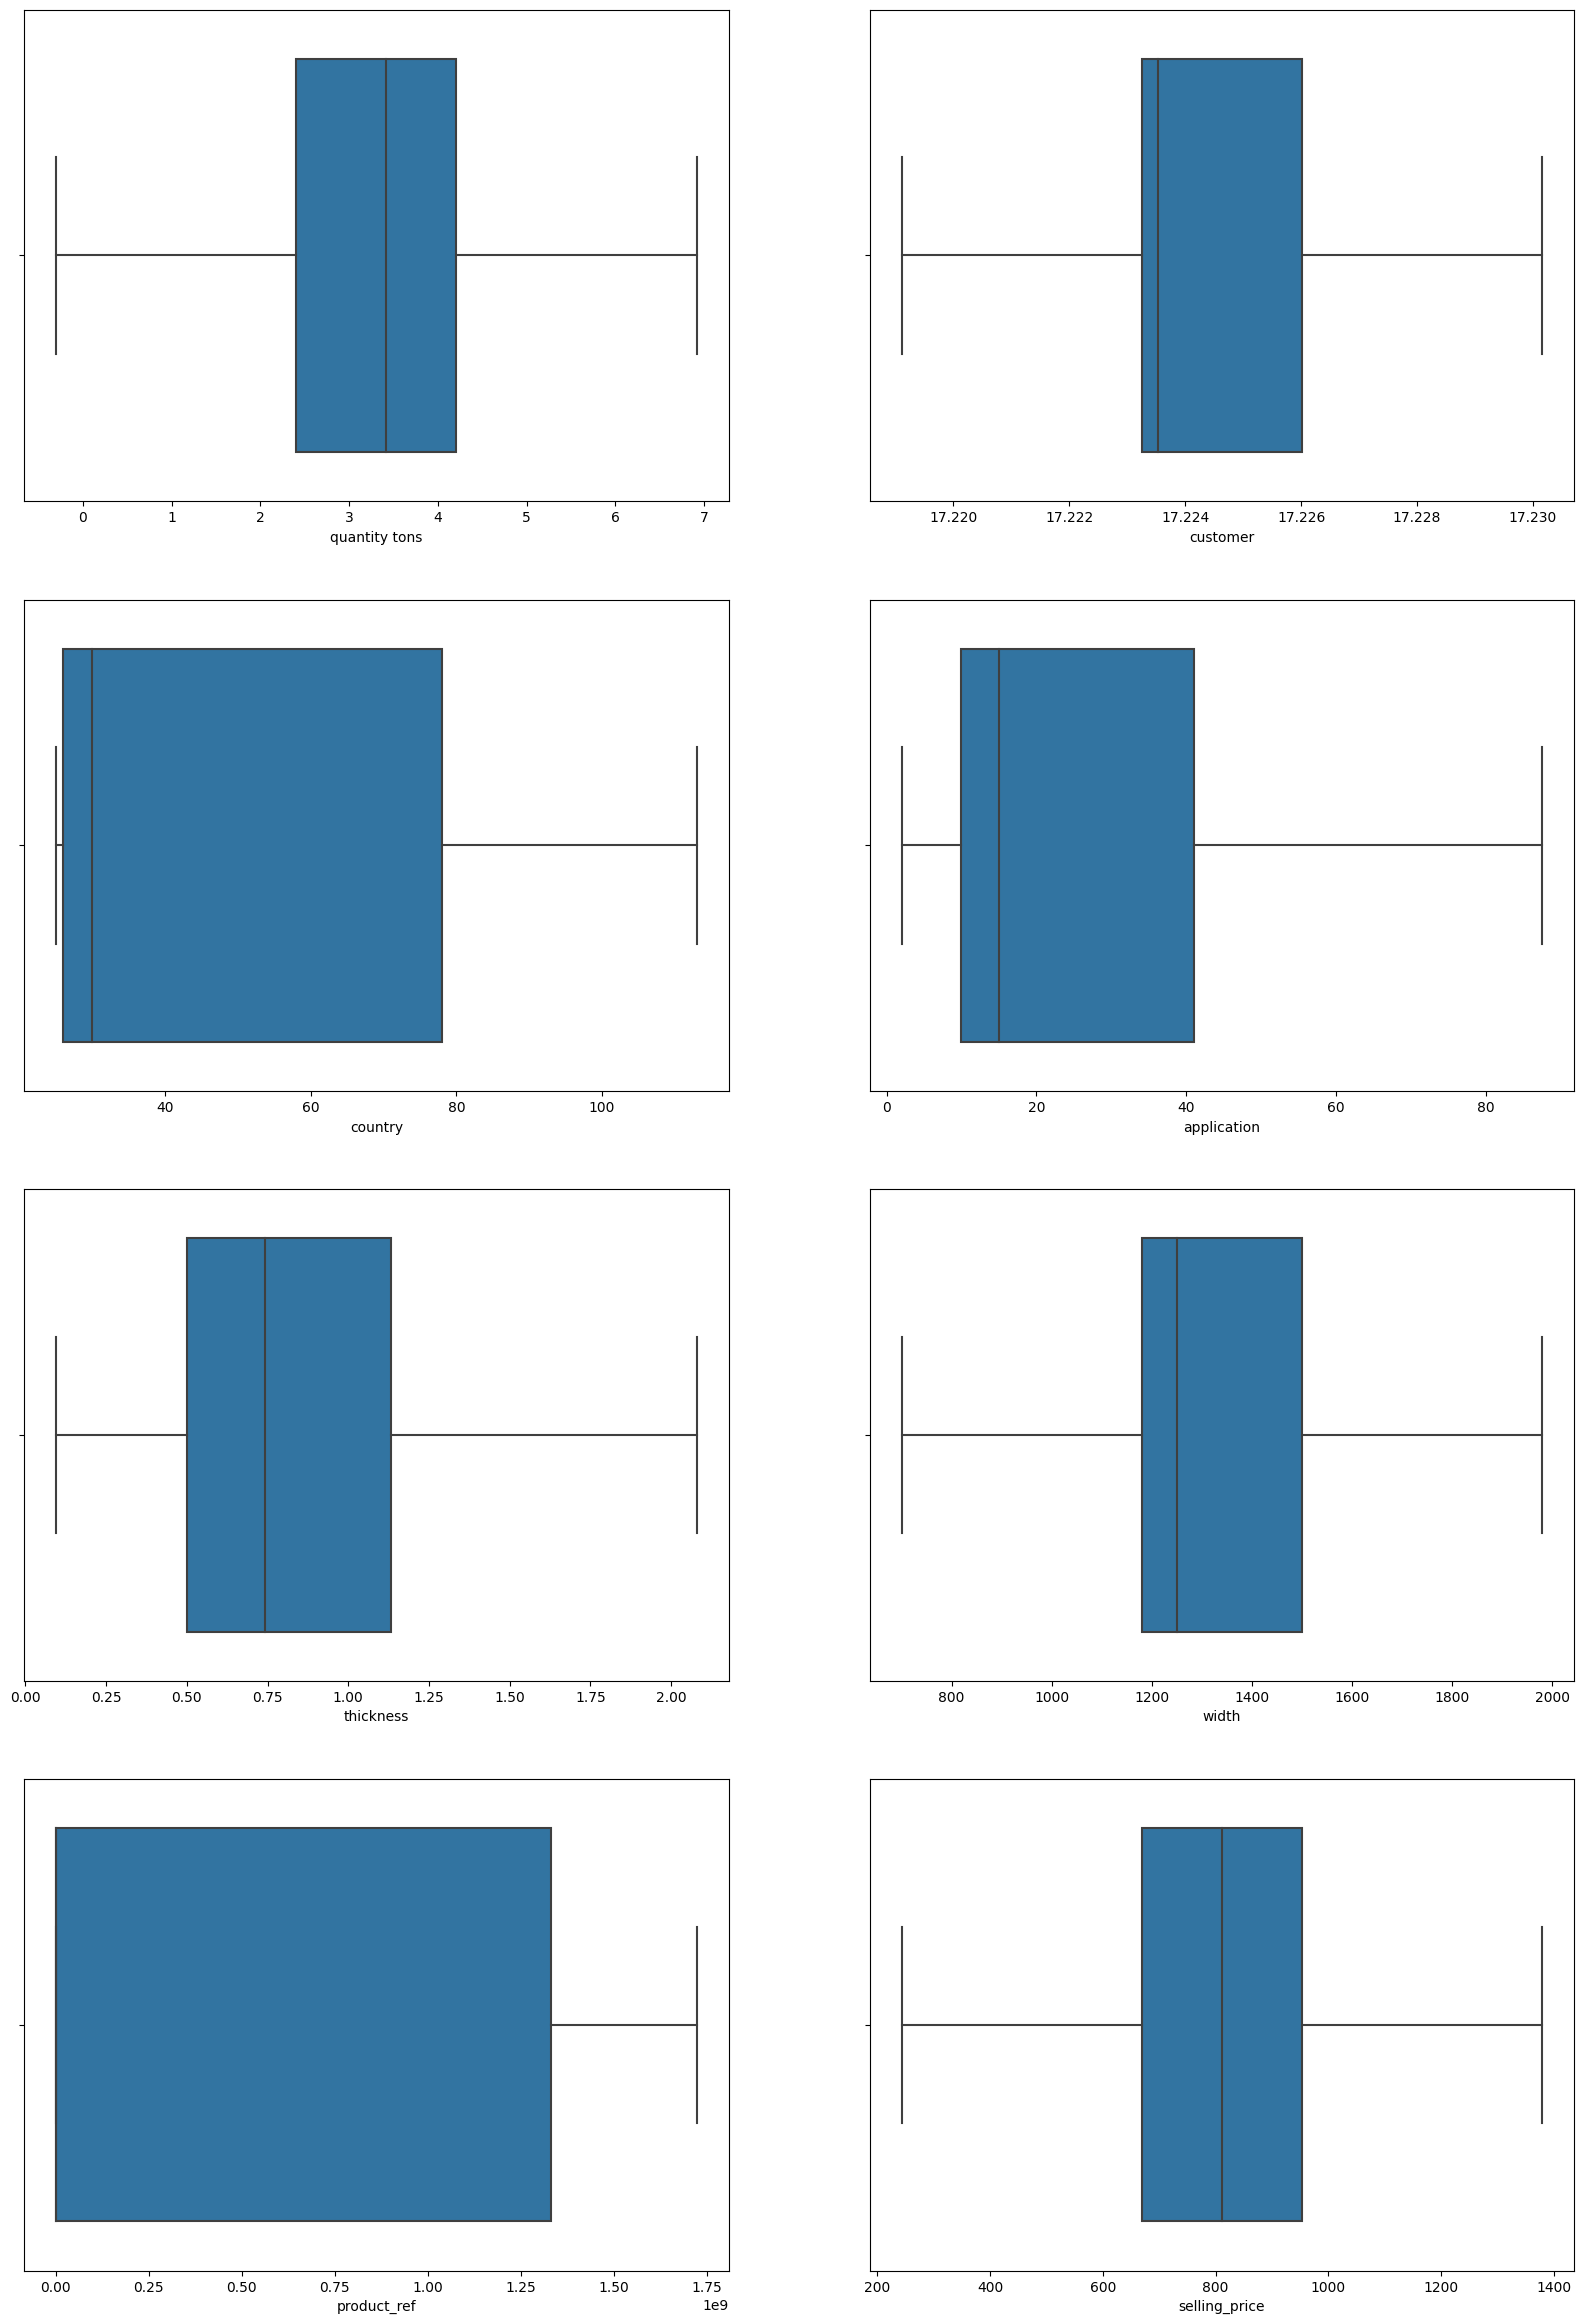

In [ ]:
plt.figure(figsize=(20,60))
i=1
for col in columns:
  plt.subplot(8,2,i)
  sns.boxplot(x=col,data=df)
  plt.xlabel
  i=i+1

2.8) FEATURE SCALING:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for col in df.columns:
  df[col]=scaler.fit_transform(df[[col]])

In [ ]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,1.0,0.595217,0.253312,0.034091,0.875,0.833333,0.093567,0.326053,0.625000,0.630397,0.970139,0.817097,0.537852
1,1.0,0.962441,0.393142,0.000000,0.875,0.833333,0.456140,0.355331,0.398438,0.088884,0.968921,0.726640,0.707746
2,1.0,0.867179,0.246274,0.056818,0.875,1.000000,0.304094,0.143551,0.196875,0.890466,0.000010,0.637177,0.353283
3,1.0,0.777722,0.831459,0.079545,0.875,0.500000,0.666667,0.393385,0.482031,0.646942,0.968921,0.637177,0.462148
4,1.0,0.965563,0.418973,0.034091,0.875,0.833333,0.093567,0.663413,1.000000,0.256748,0.000017,0.695825,0.294014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,0.0,0.683485,0.386897,0.000000,0.875,0.833333,0.456140,0.436008,0.406250,0.028863,0.094987,0.454274,0.306338
181669,0.0,0.781551,0.386897,0.000000,0.875,0.833333,0.456140,0.430966,0.625000,0.018719,0.094987,0.454274,0.304577
181670,0.0,0.245114,0.386897,0.000000,0.875,0.833333,0.456140,0.309949,0.429688,0.042449,0.094987,0.454274,0.330986
181671,0.0,0.000000,0.386897,0.000000,0.875,0.833333,0.456140,0.380542,0.429688,0.030976,0.094987,0.454274,0.315141


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  float64
 1   quantity tons  181673 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  float64
 4   status         181673 non-null  float64
 5   item type      181673 non-null  float64
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   181673 non-null  float64
 10  product_ref    181673 non-null  float64
 11  delivery date  181673 non-null  float64
 12  selling_price  181673 non-null  float64
dtypes: float64(13)
memory usage: 18.0 MB


E.D.A --2:

In [ ]:
df.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

3) BUILDING MODELS:

3.1) BUILDING REGRESSION MODELS:

3.1.1) SPLITTING DATASETS:

In [ ]:
from sklearn.model_selection import train_test_split
y=df['selling_price']
X=df.drop(['selling_price'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
#REGRESSION MODELS
seed = 53

linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed, max_depth=None, min_samples_leaf=1, min_samples_split=2, max_features=None)
et = ExtraTreesRegressor(
    n_estimators=100, 
    criterion='squared_error', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    random_state=seed, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=False, 
    oob_score=False, 
    n_jobs=None, 
    verbose=0, 
    warm_start=False, 
    ccp_alpha=0.0, 
    max_samples=None)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, subsample=1, colsample_bytree=1, gamma=0, reg_alpha=0, reg_lambda=1, random_state = seed, n_jobs = -1)


In [ ]:
# using cross validation 

def cross_validate(model):
    neg_score = cross_val_score(model, X_train, y_train, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error',error_score='raise')
    score = np.round(np.sqrt(-1*neg_score), 5)
    return score.mean()

models = [linear, lasso, ridge, elnt, dt, et, xgb]
models_n = ['linear', 'lasso', 'ridge', 'elnt', 'dt', 'et', 'xgb']
training_score = []
rmse_score = []
test_score = []
c=0
for model in models:
    scr=cross_validate(model)
    c+=1
    y_true = y_test# true target values for the test set
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)# predicted target values for the test set
    
    # Calculate R2 score tscr on tests
    tr2 = model.score(X_train, y_train)
    tscr = model.score(X_test, y_test) # or  r2 = r2_score(y_true, y_pred)


    
    training_score.append(tr2)
    rmse_score.append(scr)
    test_score.append(tscr)
    
    importances= []
    print(c, model, "RMSE_score:", scr,"\t", "Train_r2_score:", tr2,"\t", "Test_R2_score:", tscr,  "\n")

    if model in [ dt, et, xgb]:
        importances = model.feature_importances_
        model.feature_names = X.columns

        for i,v in zip(model.feature_names, importances):
            print('Feature: %s, Score: %.5f' % (i,v))
        print("\n")

        
# trainscore in df
train_score = pd.DataFrame({'Training_R2': training_score, 'rmse_score': rmse_score, 'test_score': test_score})
train_score.index = ['LR', 'LSO', 'RIDGE', 'ELNT', 'DT', 'ET', 'XGB']
train_score['rmse_score'] = (train_score['rmse_score']*100).round(4)
#scatter_plot(train_score.index, train_score['rmse_score'], 'Training Score (RMSE)', 'Models','% Training Score', 30, 'Rainbow')



1 LinearRegression(n_jobs=-1) RMSE_score: 0.13816 	 Train_r2_score: 0.4357571920037102 	 Test_R2_score: 0.4353651346092102 

2 Lasso(random_state=53) RMSE_score: 0.18391 	 Train_r2_score: 0.0 	 Test_R2_score: -3.5154070321397057e-06 

3 Ridge(random_state=53) RMSE_score: 0.13816 	 Train_r2_score: 0.4357569528706936 	 Test_R2_score: 0.4353630707908155 

4 ElasticNet(random_state=53) RMSE_score: 0.18391 	 Train_r2_score: 0.0 	 Test_R2_score: -3.5154070321397057e-06 

5 DecisionTreeRegressor(random_state=53) RMSE_score: 0.051008 	 Train_r2_score: 0.9999943440778339 	 Test_R2_score: 0.9306241889181208 

Feature: item_date, Score: 0.30730
Feature: quantity tons, Score: 0.01562
Feature: customer, Score: 0.01864
Feature: country, Score: 0.02295
Feature: status, Score: 0.16514
Feature: item type, Score: 0.00315
Feature: application, Score: 0.00742
Feature: thickness, Score: 0.02275
Feature: width, Score: 0.01434
Feature: material_ref, Score: 0.02016
Feature: product_ref, Score: 0.33900
Feature

In [ ]:
train_score['test_score']= train_score['test_score'].apply(lambda x : round(x,3))
train_score.sort_values(by='test_score')

,Training_R2,rmse_score,test_score
LSO,0.000000,18.3910,-0.000
ELNT,0.000000,18.3910,-0.000
LR,0.435757,13.8160,0.435
RIDGE,0.435757,13.8160,0.435
XGB,0.925588,5.1396,0.923
DT,0.999994,5.1008,0.931
ET,0.999994,3.8504,0.960


In [ ]:
model = xgb
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=53, ...)

In [ ]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  float64
 1   quantity tons  181673 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  float64
 4   status         181673 non-null  float64
 5   item type      181673 non-null  float64
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   181673 non-null  float64
 10  product_ref    181673 non-null  float64
 11  delivery date  181673 non-null  float64
 12  selling_price  181673 non-null  float64
dtypes: float64(13)
memory usage: 18.0 MB


3.2) Classification model:

3.2.1) SPLITTING DATASETS:

In [ ]:
from sklearn.model_selection import train_test_split
y=df['status']
X=df.drop(['status'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

3.2.2) BUILDING MODELS:

In [ ]:

df_c =df_classifier[df_classifier['status'].isin(['Won', 'Lost'])]
len(df_c)

150450

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df_c['status']
X= df_c[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons', 'selling_price','application', 'thickness', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.9160850780990363
Confusion Matrix:
[[ 5697  1266]
 [ 1259 21868]]


Confusion Matrix:
[[ 5697  1266]
 [ 1259 21868]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      6963
           1       0.95      0.95      0.95     23127

    accuracy                           0.92     30090
   macro avg       0.88      0.88      0.88     30090
weighted avg       0.92      0.92      0.92     30090



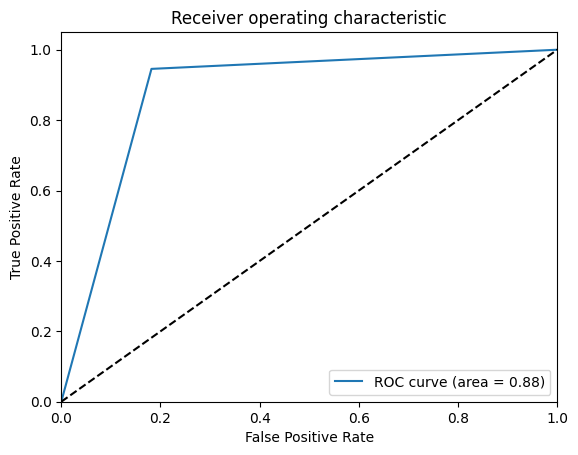

In [ ]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
df['status'].value_counts()

0.875    116012
0.125     34438
0.250     19573
0.625      4276
0.750      4170
0.000      3140
0.500        53
0.375        10
1.000         1
Name: status, dtype: int64

In [ ]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)